In [265]:
%run hyperStack_basic.py

# global parameter
arg = dict()

In [245]:
# load images from folder
# specify path to images
pathData = '/Users/au652733/Library/CloudStorage/GoogleDrive-info@silviazieger.com/My Drive/01 projects/2023_AU/hyperspectral_intro/'

# specify keyword to select only certain images. This script works with hsi cubes 
# Make sure that the .raw images are together with the .hdr file and refer to the .hdr file.
# * are used as placeholder
keyword = '20231030_*corrected*.hdr'
ls_files = list([f for f in glob(pathData + '/' + keyword)])

print('number of collected files:', len(ls_files))
ls_files

number of collected files: 2


['/Users/au652733/Library/CloudStorage/GoogleDrive-info@silviazieger.com/My Drive/01 projects/2023_AU/hyperspectral_intro/20231030_cube_corrected.hdr',
 '/Users/au652733/Library/CloudStorage/GoogleDrive-info@silviazieger.com/My Drive/01 projects/2023_AU/hyperspectral_intro/20231030_cubeOptode_LEDflashlamp_corrected.hdr']

In [246]:
# import overall cube information for all selected files in ls_files
dic_para = dict(map(lambda en: (en[0], load_cube(file_hdr=en[1])), enumerate(ls_files)))

# for each file the following information are retrieved - example for file 1 (which is the second file in ls_files)
# cube              image stack or (hyperspectral) image cube containing the intensity values in each pixel along all spectral bands
# Integration time  based on the settings for image acquisition; given in ms
# Wavelength        list of wavelengths aka spectral bands that are effectively used (after applying the internal correction)
dic_para[1].keys()

dict_keys(['cube', 'Integration time', 'Wavelength'])

In [247]:
# separating the general dictionary and retrieve cube and wavelength information
# dictionary of wavelengths for each image cube
dic_wl = dict(map(lambda en: (en, list(dic_para[en]['Wavelength'])), dic_para.keys()))

# dictionary of intensity values for the entire image cube
dic_data = dict(map(lambda en: (en, dic_para[en]['cube'].open_memmap()), dic_para.keys()))

# -----------------------------------------------------
# information we obtain for each cube
print('cube shape', dic_data[1].shape)
print('data type', type(dic_data[1]))

cube shape (1088, 2048, 150)
data type <class 'numpy.memmap'>


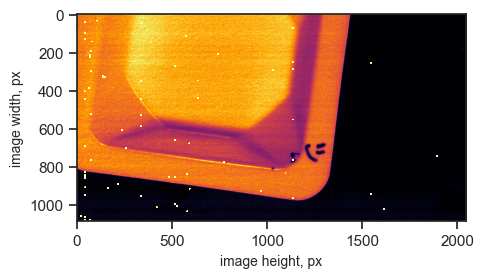

In [248]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.set_xlabel('image height, px', fontsize=10)
ax.set_ylabel('image width, px', fontsize=10)

ax.imshow(dic_data[0][:, :, 10], vmin=0, vmax=1., cmap='inferno')

plt.tight_layout()
plt.show()

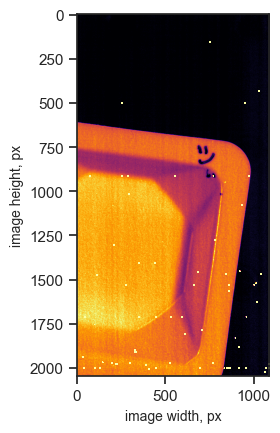

In [249]:
# cube rotation
# to specify the rotation add the keyword "rotation" to the dictionary arg and specify the angle (in deg; integer)
arg['rotation'] = 90
data_rot = dict(map(lambda en: (en, rotation_cube(img_cube=dic_data[en], arg=arg)), range(0, len(dic_data))))

# --------------------------------------------------------------
# plotting the rotated cube
fig, ax = plt.subplots(figsize=(5, 4.5))
ax.set_ylabel('image height, px', fontsize=10)
ax.set_xlabel('image width, px', fontsize=10)

# plot the image cube at one specific wavelength 
# here it is the k-th in the list of available wavelength
k = 10
# specify min and max values - vmin usually set to 0 and vmax might change depend with the settings for image acquisition
vmin, vmax = 0, 1
# plot the image cube
ax.imshow(data_rot[0][:,:,k], vmin=vmin, vmax=vmax, cmap='inferno')
plt.tight_layout()
plt.show()

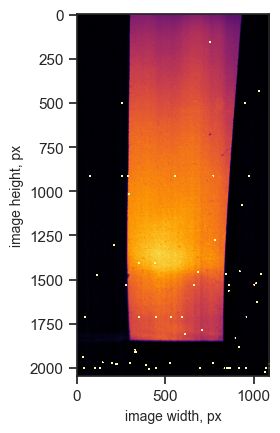

In [250]:
# do the same for the optode image cube and plot a "test cube" at one selected spectral band
band_select = 100
vmin, vmax = 0, 0.01

# --------------------------------------------
fig, ax = plt.subplots(figsize=(5, 4.5))
ax.set_ylabel('image height, px', fontsize=10)
ax.set_xlabel('image width, px', fontsize=10)

ax.imshow(data_rot[1][:,:, band_select], vmin=vmin, vmax=vmax, cmap='inferno')
plt.tight_layout()
plt.show()

cube shape (height x width x bands) ·  (2048, 1088, 150)


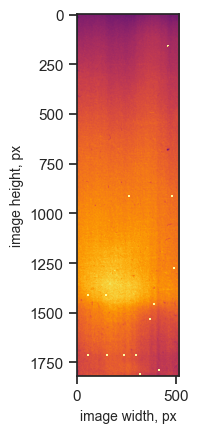

In [251]:
# crop the image cube. Starting from here only focus on the one image with the optode
print('cube shape (height x width x bands) · ', data_rot[1].shape)

# >> select pixel range first for height, then width but include all bands -> use propper naming
df_opt_crop = data_rot[1][:1820, 295:810,:] 

# --------------------------------------------
# plot to double check
fig, ax = plt.subplots(figsize=(5, 4.5))
ax.set_ylabel('image height, px', fontsize=10)
ax.set_xlabel('image width, px', fontsize=10)

ax.imshow(df_opt_crop[:,:,band_select], vmin=vmin, vmax=vmax, cmap='inferno')
plt.tight_layout()
plt.show()

In [252]:
# rearrange cube form "height x width x bands" >> "bands x height x width"
print('initial cube shape:', df_opt_crop.shape)
df_opt_crop = df_opt_crop.swapaxes(0, -1)           # swap first and last axis (aka x (> iamge height) and z (> spectral bands) axis) 
df_opt_crop = df_opt_crop.swapaxes(1, -1)           # swap second and last axis (aka y (> image width)  and z (> image height) axis)
print('finale cube shape:', df_opt_crop.shape)

initial cube shape: (1820, 515, 150)
finale cube shape: (150, 1820, 515)


In [253]:
# how does it look know, when we select the 100th spectral band 
band_select = 100
print(str(band_select)+'-th band equals wavelength {:.2f} nm'.format(dic_wl[1][band_select]))
pd.DataFrame(df_opt_crop[band_select])

100-th band equals wavelength 758.59 nm


,0,1,2,3,4,5,6,7,8,9,...,505,506,507,508,509,510,511,512,513,514
0,0.000094,0.000181,0.000474,0.001224,0.002092,0.003848,0.003988,0.003666,0.003990,0.003727,...,0.003260,0.003107,0.003760,0.003529,0.003465,0.003409,0.003754,0.003317,0.003251,0.003686
1,0.000071,0.000305,0.000231,0.000832,0.002182,0.003347,0.003466,0.003692,0.003482,0.003728,...,0.003243,0.003280,0.003117,0.003428,0.003554,0.003017,0.003322,0.003277,0.003042,0.003365
2,0.000238,-0.000002,0.000449,0.000912,0.002079,0.003108,0.003523,0.003727,0.004093,0.003422,...,0.003684,0.002890,0.002864,0.002808,0.003480,0.003465,0.003029,0.003349,0.002775,0.002912
3,0.000254,0.000549,0.000353,0.000457,0.002254,0.002901,0.003767,0.003504,0.003508,0.003752,...,0.002924,0.002654,0.003157,0.003004,0.002939,0.003374,0.002965,0.002909,0.003508,0.003119
4,0.000368,0.000205,0.000167,0.000782,0.001819,0.003214,0.003251,0.003256,0.003740,0.003166,...,0.003335,0.003186,0.003291,0.003428,0.003479,0.003653,0.002950,0.002957,0.003365,0.003441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,0.001736,0.001975,0.003269,0.003006,0.004435,0.004363,0.005043,0.005363,0.005506,0.005754,...,0.005227,0.004695,0.004053,0.004625,0.004306,0.004594,0.004474,0.004090,0.005171,0.004483
1816,0.001628,0.002316,0.002426,0.003636,0.003157,0.004338,0.004825,0.005137,0.005205,0.005034,...,0.004450,0.004038,0.004812,0.004718,0.005276,0.004943,0.004564,0.005084,0.005522,0.004603
1817,0.001696,0.002570,0.003085,0.003353,0.003034,0.004912,0.004728,0.005899,0.004870,0.004326,...,0.004022,0.004791,0.004219,0.004017,0.004595,0.004141,0.003912,0.004683,0.005473,0.004429
1818,0.001639,0.003080,0.002043,0.002838,0.004097,0.005208,0.004590,0.005263,0.004943,0.005223,...,0.004571,0.004373,0.004520,0.004199,0.004439,0.003666,0.005093,0.004232,0.004572,0.004575


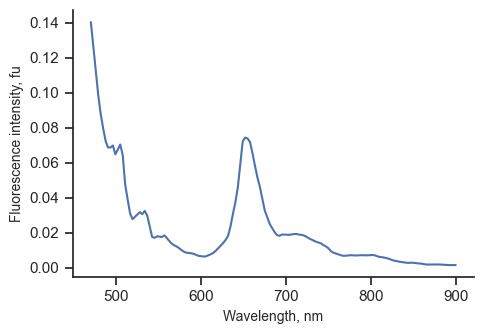

In [254]:
# How to plot the spectrum of one specific pixel?
# select the pixel you are interested in (pxH... pixel in the height direction; pxW... pixel in the width direction)
pxH, pxW = 1400, 100

# extract the specified pixel (pxW, pxH) for each layer of a spectral band and pack it as a DataFrame 
# with the actual wavelength as the index 
df_px = pd.DataFrame([df_opt_crop[wl][pxH, pxW] for wl in range(len(dic_wl[1]))], index=dic_wl[1], columns=[(pxH, pxW)])

# -------------------------------------
# plotting the spectrum
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.set_xlabel('Wavelength, nm', fontsize=10)
ax.set_ylabel('Fluorescence intensity, fu', fontsize=10)

ax.plot(df_px, lw=1.5)
sns.despine()
plt.tight_layout()
plt.show()

In [267]:
# How to select one or a list of RoIs and average/std including outlier removal?
# to specify an RoI - specify the top left corner and the height and width roi = [(xy of top left), width, height]
# if more than one RoI shall be retrieved - combine them to a list of RoI called ls_RoI
roi1 = [(50, 600), 400, 1000]
roi2 = [(10, 10), 400, 300]
# list of RoIs
ls_RoI = [roi1, roi2]

# calculate the mean and standard error for every RoI including an outlier removal test
# for the outlier removal - if the outlier should be replaced by the average of the surrounding entries, set the keyowrd blurr as True,
# otherwise (when filled with NaN) set blurr as False. 
# !!! The replacement of outliers with the average of the surrounding requires a bit of a time... it is not the most efficient code.
blurr = True

# calculate the average and standard error
df_mean = pd.concat([pd.DataFrame([np.nanmean(outlier_remove(pd.DataFrame(df_opt_crop[wl][roi[0][1]:roi[0][1]+roi[2], 
                                                                                          roi[0][0]:roi[0][0]+roi[1]]), blurr=blurr)) 
                    for wl in range(len(dic_wl[1]))], index=dic_wl[1], columns=[roi[0]]) for roi in ls_RoI], axis=1)
print('average done.')
df_std = pd.concat([pd.DataFrame([np.nanstd(outlier_remove(pd.DataFrame(df_opt_crop[wl][roi[0][1]:roi[0][1]+roi[2], 
                                                                                        roi[0][0]:roi[0][0]+roi[1]]), blurr=blurr)) 
                    for wl in range(len(dic_wl[1]))], index=dic_wl[1], columns=[roi[0]]) for roi in ls_RoI], axis=1)
print('standard error done.')

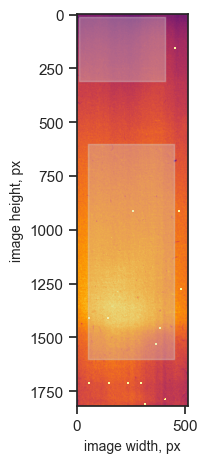

In [269]:
fig, ax = plt.subplots()
ax.set_ylabel('image height, px', fontsize=10)
ax.set_xlabel('image width, px', fontsize=10)

# plot the optode image at the same selected spectral band and the vmin/vmax values
ax.imshow(df_opt_crop[band_select, :,:], vmin=vmin, vmax=vmax, cmap='inferno')

# add the RoI as a light grey rectangle
for roi in ls_RoI:
    highlight_cell(x=roi[0][0], y=roi[0][1], width=roi[1], height=roi[2], color='lightgrey', linewidth=1.05, 
                   fill=True, alpha=0.35)

plt.tight_layout()
plt.show()

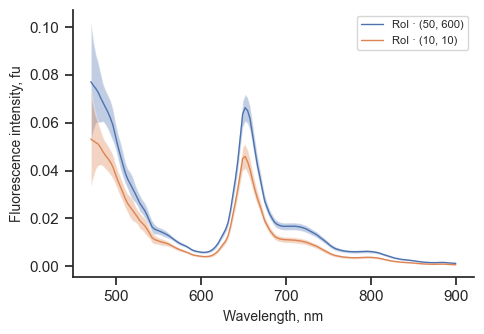

In [270]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.set_xlabel('Wavelength, nm', fontsize=10)
ax.set_ylabel('Fluorescence intensity, fu', fontsize=10)

for roi in df_mean.columns:
    ax.plot(df_mean[roi], lw=1., label='RoI · '+str(roi))
    ax.fill_between(df_mean.index, df_mean[roi].to_numpy()-df_std[roi].to_numpy(), 
                    df_mean[roi].to_numpy()+df_std[roi].to_numpy(), alpha=0.35)

ax.legend(fontsize=8, fancybox=True)
sns.despine()
plt.tight_layout()
plt.show()

In [361]:
## !!! ratiometric intensity SV fit